#### E-COMMERCE SALES DATA ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
data = pd.read_excel("Superstore_USA.xlsx")
data.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67,88524
6,25549,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,Technology,...,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.4453,12,1451.37,88526
7,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.3665,12,6362.85,90193
8,19483,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,Office Supplies,...,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.2600,18,113.25,90197
9,24782,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,Office Supplies,...,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.4673,16,1515.17,90194


In [10]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [19]:
data["Product Base Margin"]=data["Product Base Margin"].fillna(method="ffill")
data.isnull().sum()
# REMOVING NULL VALUES

C:\Users\BAHRIA\AppData\Local\Temp\ipykernel_6024\3410443295.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Product Base Margin"]=data["Product Base Margin"].fillna(method="ffill")


Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

### order priority by customer

In [46]:
data["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [51]:
pg=data.groupby("Order Priority")["Order Priority"].count()
print(pg)

Order Priority
Critical         1805
High             1970
Low              1926
Medium           1844
Not Specified    1881
Name: Order Priority, dtype: int64


In [38]:
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [44]:
data["Order Priority"]=data["Order Priority"].replace("Critical ","Critical")

In [45]:
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

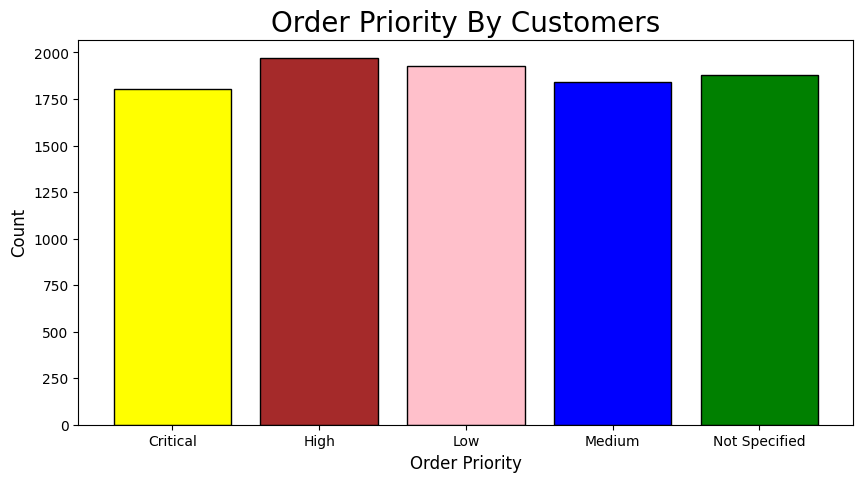

In [63]:

color=["yellow","brown","pink","blue","green"]
plt.figure(figsize=(10,5))
plt.bar(pg.index,pg.values,color=color,edgecolor="black")# bar chart
plt.title("Order Priority By Customers",fontsize =20)
plt.xlabel("Order Priority",fontsize =12)
plt.ylabel("Count",fontsize =12)
plt.show()

### SHIPING MODE ANALYSIS

In [111]:
ship=data.groupby("Ship Mode")["Ship Mode"].count()
print(ship)

Ship Mode
Delivery Truck    1283
Express Air       1107
Regular Air       7036
Name: Ship Mode, dtype: int64


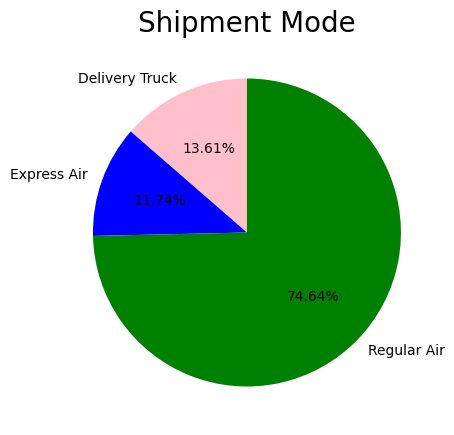

In [121]:
ship=data.groupby("Ship Mode")["Ship Mode"].count()


color=["pink","blue","green"]
plt.figure(figsize=(10,5))
plt.pie(ship.values,labels=ship.index,colors=color,autopct="%.2f%%",startangle=90 )# bar chart
plt.title("Shipment Mode",fontsize =20)
plt.show()

### Shipment Mode according with Product category

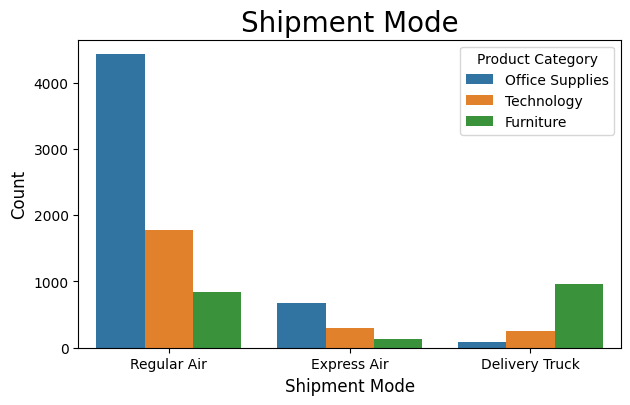

In [169]:
ship=data.groupby("Ship Mode")["Ship Mode"].count()
color=["yellow","brown","pink","blue","green"]
plt.figure(figsize=(7,4))
sns.countplot(x="Ship Mode",data=data,hue="Product Category")# bar chart
plt.title("Product Category",fontsize =20)
plt.xlabel("Shipment Mode",fontsize =12)
plt.ylabel("Count",fontsize =12)
plt.show()

### Order Priority By Customers

Customer Segment
Consumer          1894
Corporate         3375
Home Office       2316
Small Business    1841
Name: Customer Segment, dtype: int64


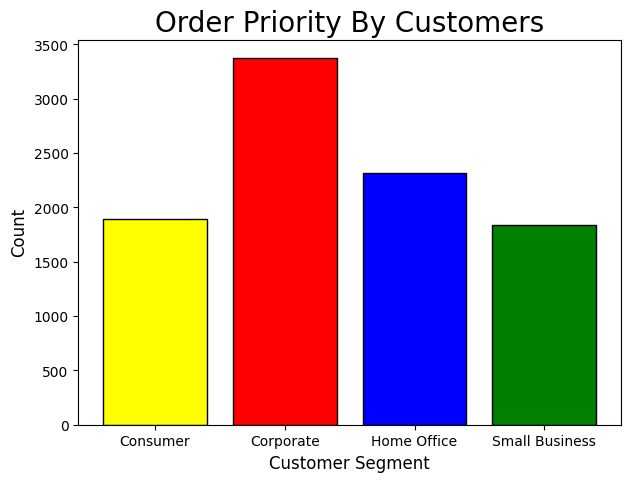

In [144]:
pg=data.groupby("Customer Segment")["Customer Segment"].count()
print(pg)


color=["yellow","red","blue","green"]
plt.figure(figsize=(7,5))
plt.bar(pg.index,pg.values,color=color,edgecolor="black")# bar chart
plt.title("Order Priority By Customers",fontsize =20)
plt.xlabel("Customer Segment",fontsize =12)
plt.ylabel("Count",fontsize =12)
plt.show()

### High Demand Product Category




Product Category
Furniture          1933
Office Supplies    5181
Technology         2312
Name: Product Category, dtype: int64


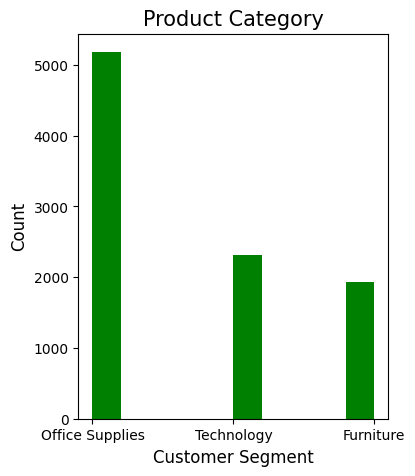

In [153]:
pg=data.groupby("Product Category")["Product Category"].count()
print(pg)


color=["yellow","blue","green"]
plt.figure(figsize=(4,5))
plt.hist(x=data["Product Category"],color="Green")# bar chart
plt.title("Product Category",fontsize =15)
plt.xlabel("Customer Segment",fontsize =12)
plt.ylabel("Count",fontsize =12)
plt.show()

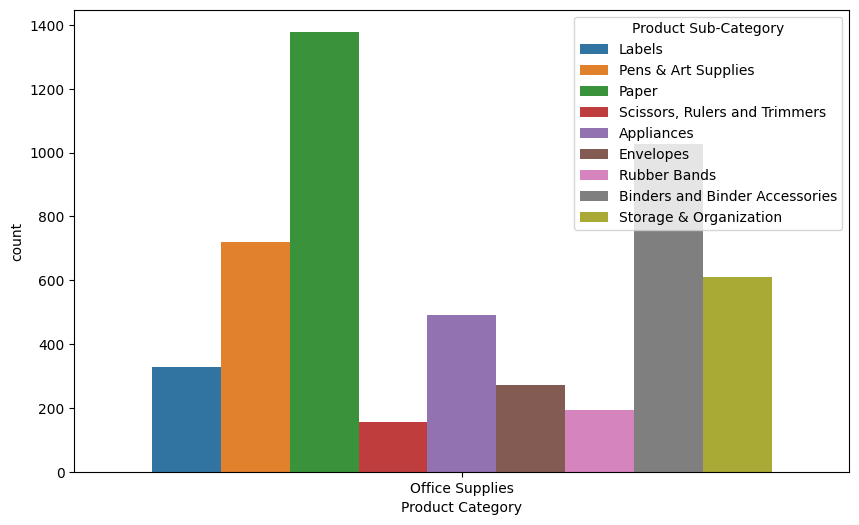

In [184]:
color=["yellow","blue","green"]
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=data[data["Product Category"]=="Office Supplies"],hue="Product Sub-Category")

plt.show()

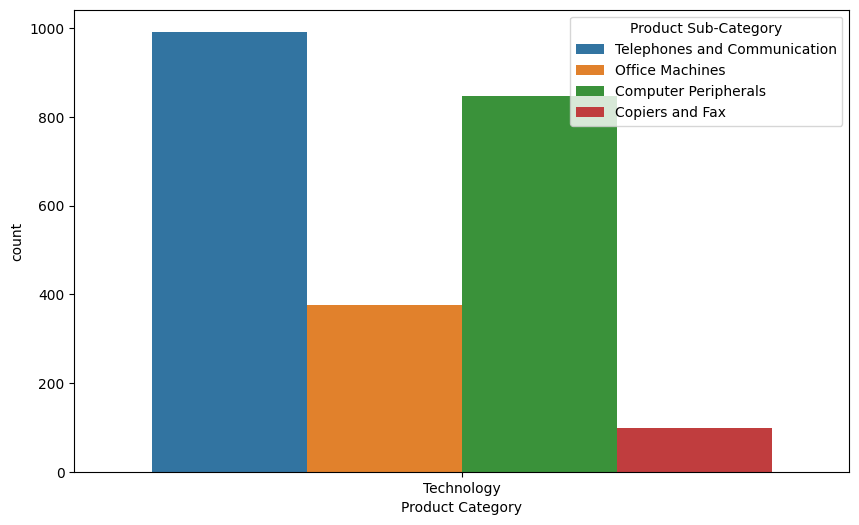

In [186]:
color=["yellow","blue","green"]
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=data[data["Product Category"]=="Technology"],hue="Product Sub-Category")

plt.show()

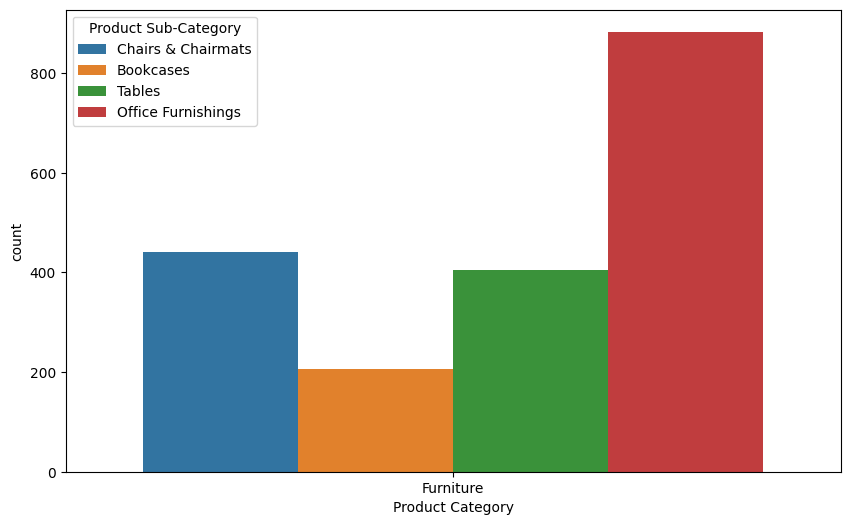

In [187]:
color=["yellow","blue","green"]
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=data[data["Product Category"]=="Furniture"],hue="Product Sub-Category")

plt.show()

### Year Wise Sales

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [192]:
data["Order Date"].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int32

In [194]:
data["Order Year"]=data["Order Date"].dt.year
data["Order Year"]

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Year, Length: 9426, dtype: int32

In [199]:
data["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

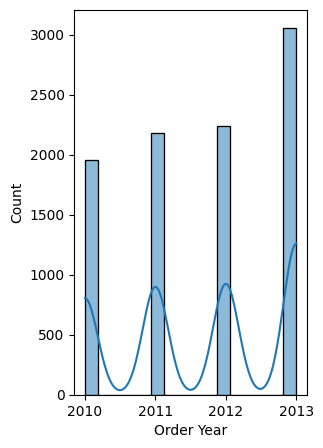

In [204]:
plt.figure(figsize=(3,5))

sns.histplot(data,x=data["Order Year"],kde= True)
plt.show()

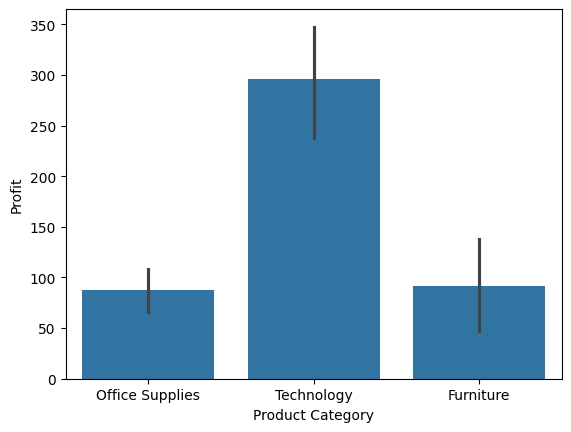

In [211]:
color=["yellow","blue","green"]
sns.barplot(data=data,x="Product Category",y="Profit")
plt.show()

In [216]:
data["State or Province"].value_counts()[:5]# top five


State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

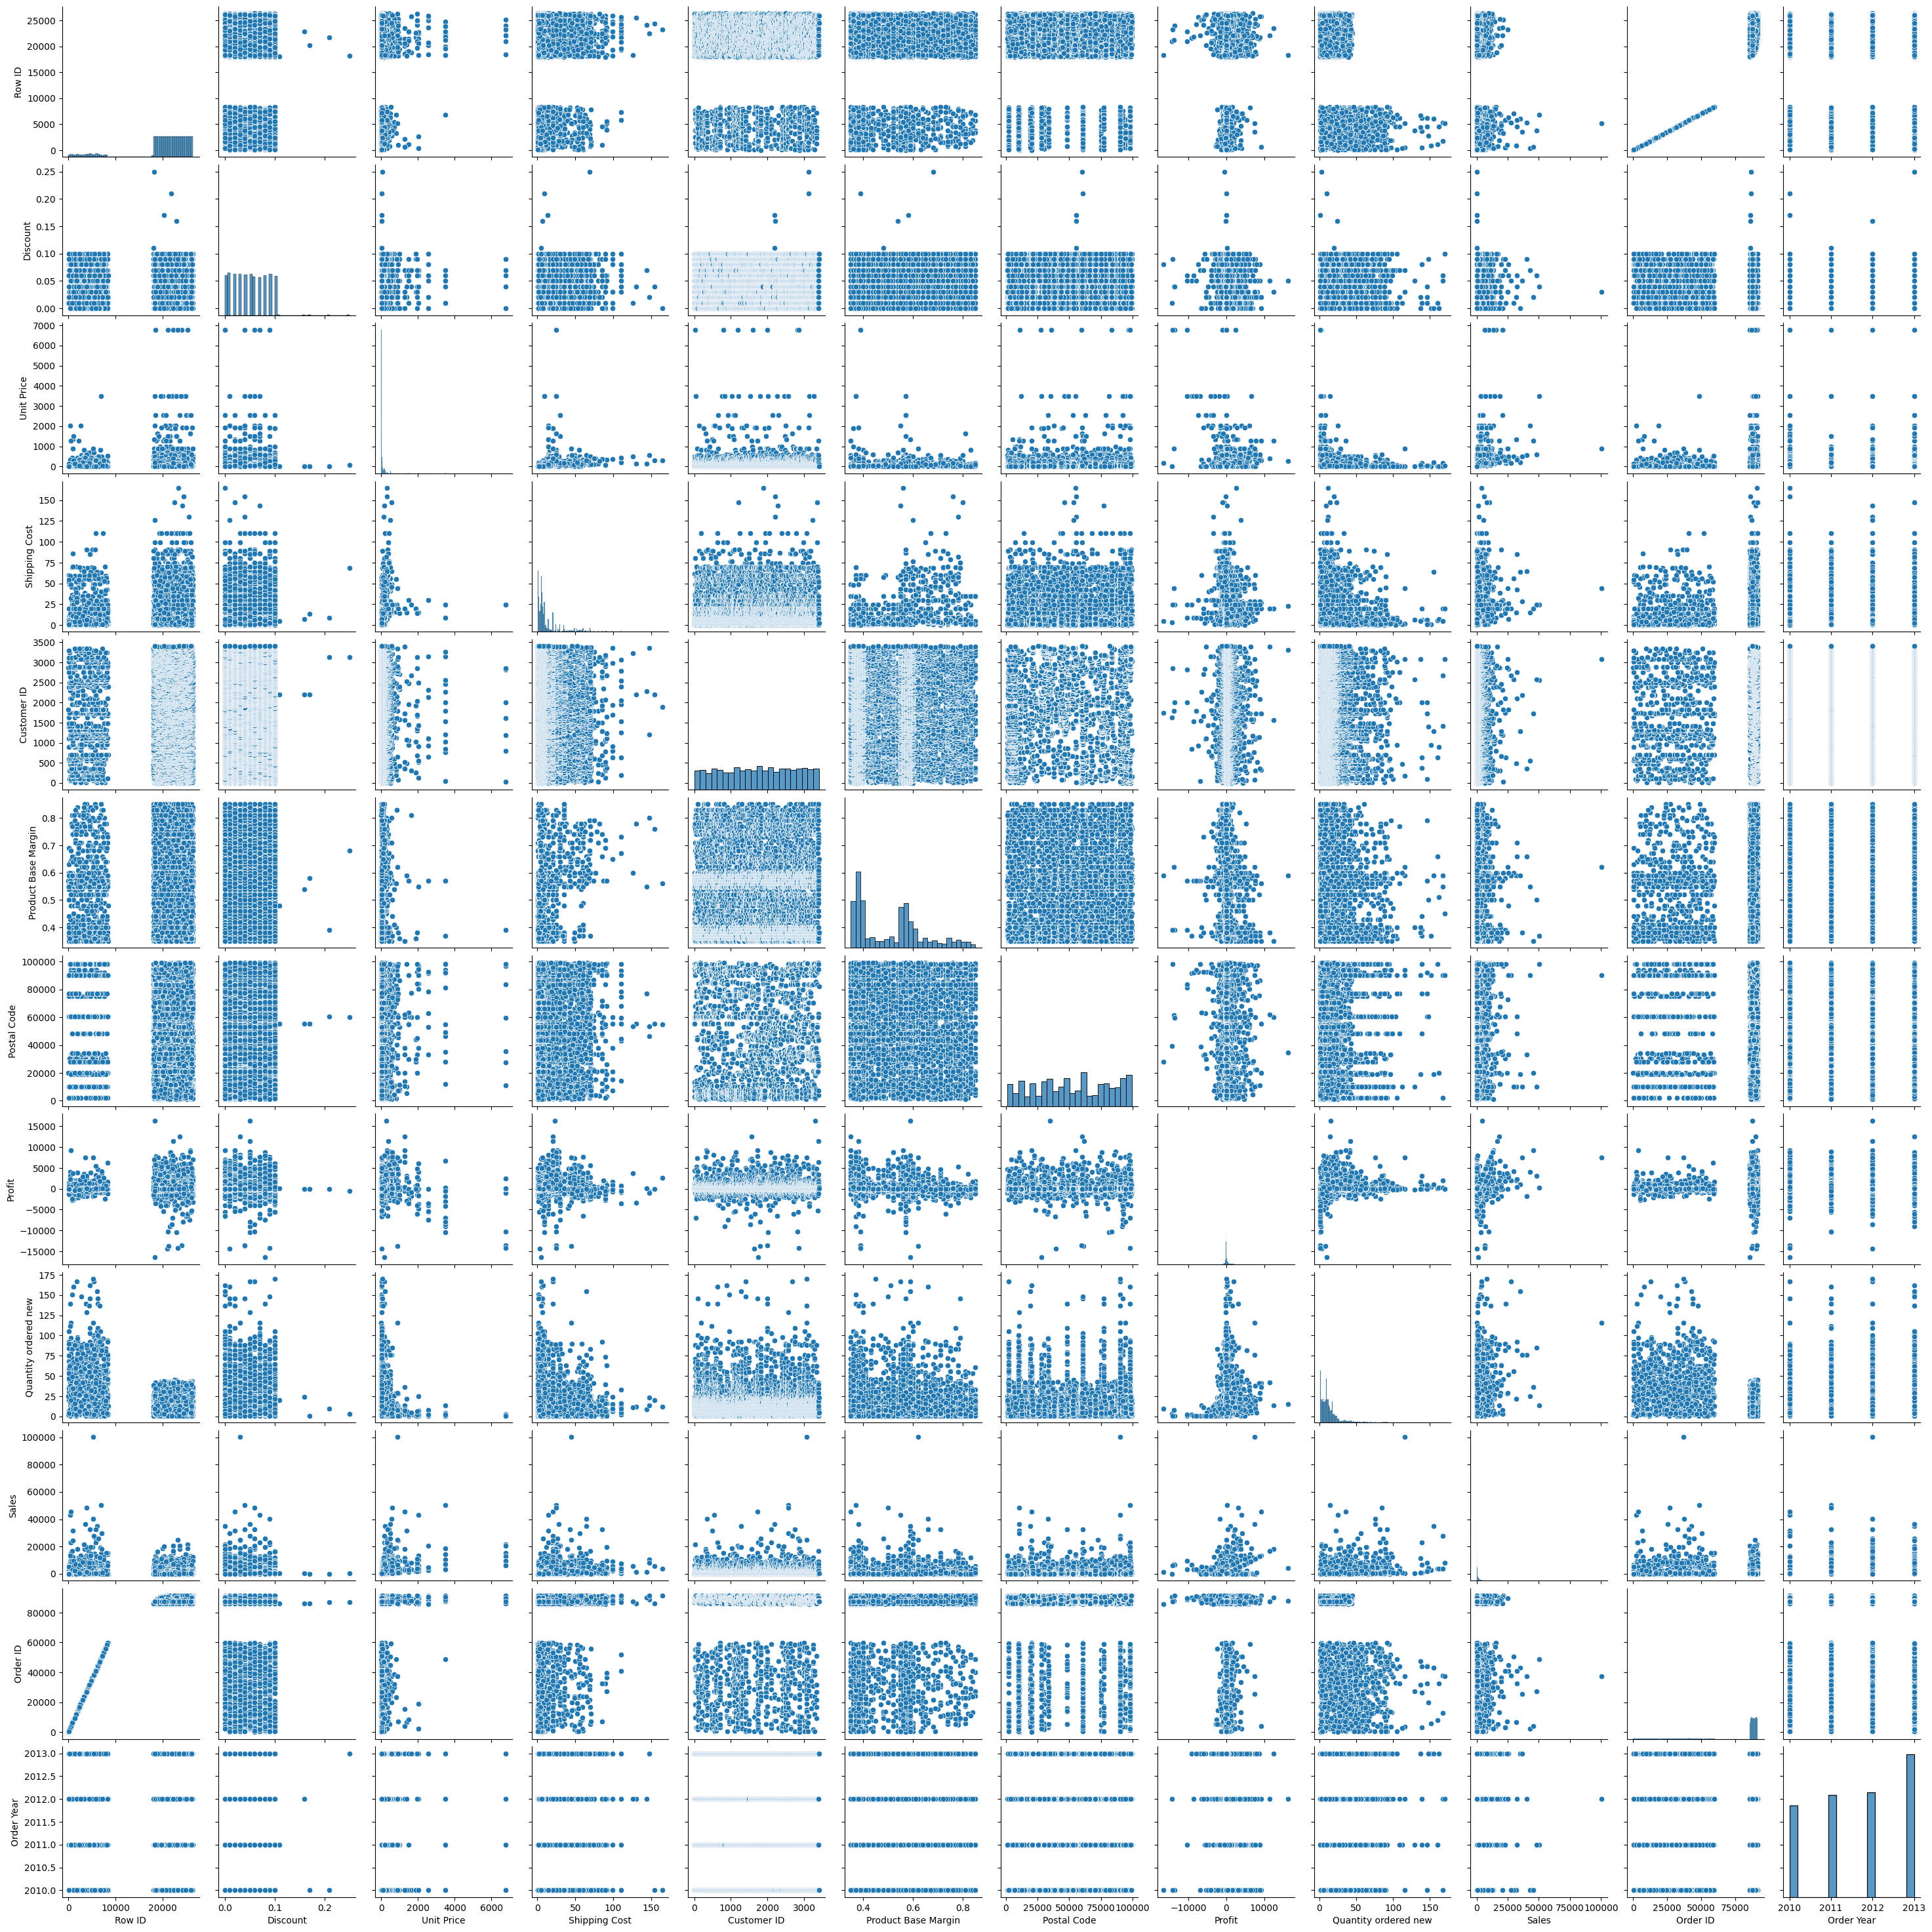